In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("employee_attrition_dataset.csv")

In [5]:
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,...,No,3,33,0,4,1,3,44,3,No


In [6]:
df.shape

(1000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,39.991,11.780055,20.0,30.00,41.0,50.25,59.0
Job_Level,1000.0,3.055,1.399977,1.0,2.00,3.0,4.00,5.0
Monthly_Income,1000.0,11499.899,4920.529231,3001.0,7395.75,11256.0,15855.00,19999.0
Hourly_Rate,1000.0,57.837,24.702037,15.0,36.00,58.0,80.00,99.0
Years_at_Company,1000.0,14.922,8.350548,1.0,8.00,15.0,22.00,29.0
Years_in_Current_Role,1000.0,7.539,4.001061,1.0,4.00,8.0,11.00,14.0
Years_Since_Last_Promotion,1000.0,4.408,2.995080,0.0,2.00,4.0,7.00,9.0
Work_Life_Balance,1000.0,2.495,1.105077,1.0,2.00,3.0,3.00,4.0
Job_Satisfaction,1000.0,3.151,1.426967,1.0,2.00,3.0,4.00,5.0


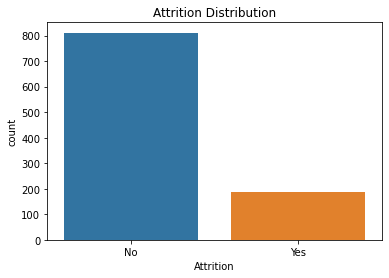

In [9]:
#Visualize Attrition Distribution
sns.countplot(data=df,x='Attrition')
plt.title('Attrition Distribution')
plt.show()

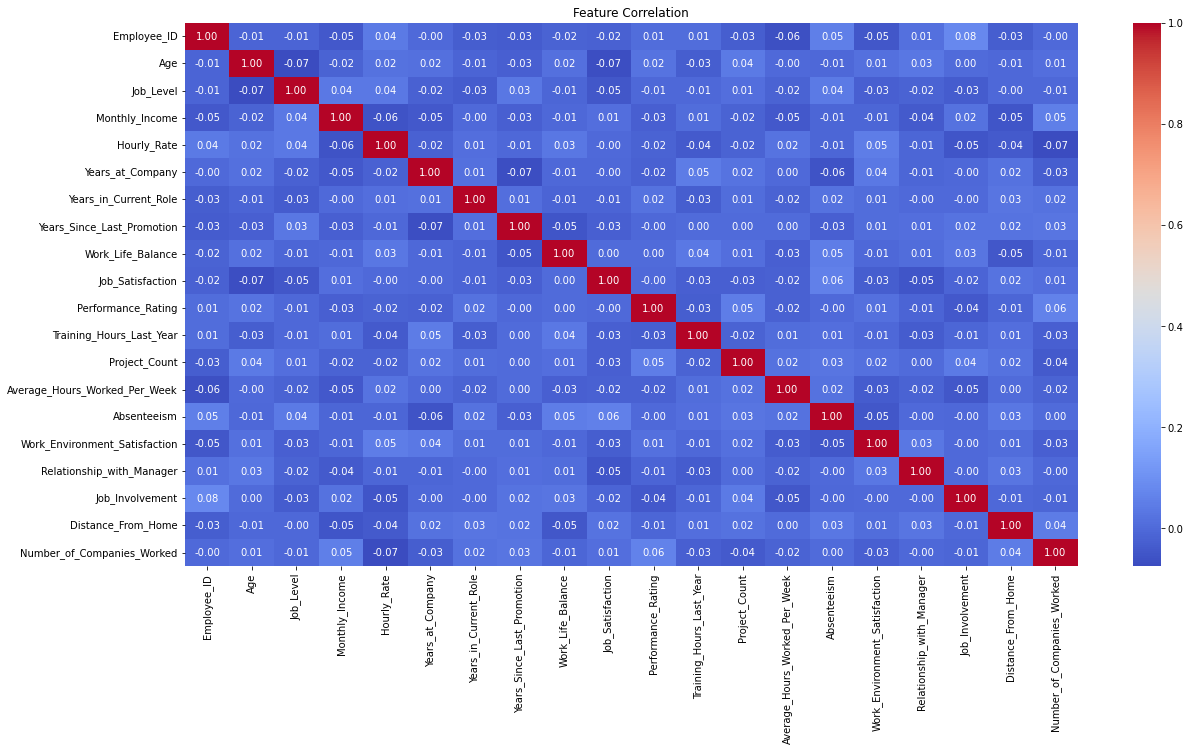

In [10]:
#Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()

In [11]:
#Data Preprocessing
#Enocong Categorical Features
cat_cols=df.select_dtypes(include=['object']).columns
encoder=LabelEncoder()
for col in cat_cols:
    df[col]=encoder.fit_transform(df[col])

In [12]:
#Normalize numerical features
num_cols=df.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [13]:
#Target and feature split
X=df.drop(['Attrition','Employee_ID'],axis=1)
y=df['Attrition']

In [14]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [15]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [16]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

In [17]:
#Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[101  72]
 [ 43 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64       173
           1       0.60      0.72      0.65       152

    accuracy                           0.65       325
   macro avg       0.65      0.65      0.65       325
weighted avg       0.66      0.65      0.65       325

ROC AUC Score: 0.6931472467295406


In [18]:
# Hyperparameter Tuning
log_reg = LogisticRegression(max_iter= 1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'solver': ['liblinear', 'lbfgs', 'saga'],
}

log_reg_cv_model = GridSearchCV(estimator=log_reg, param_grid=log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_cv_model.fit(X_train, y_train)

print("Best parameters:", log_reg_cv_model.best_params_)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear')
log_reg_tuned = log_reg.fit(X_train, y_train)
y_pred = log_reg_tuned.predict(X_test)
y_proba = log_reg_tuned.predict_proba(X_test)[:, 1]
log_reg_score=roc_auc_score(y_test, y_proba)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Log Reg ROC AUC Score:", log_reg_score)

Confusion Matrix:
 [[101  72]
 [ 43 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64       173
           1       0.60      0.72      0.65       152

    accuracy                           0.65       325
   macro avg       0.65      0.65      0.65       325
weighted avg       0.66      0.65      0.65       325

Log Reg ROC AUC Score: 0.6935655613020992


In [20]:
#KNN Classifier
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

In [21]:
#Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[ 73 100]
 [  4 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58       173
           1       0.60      0.97      0.74       152

    accuracy                           0.68       325
   macro avg       0.77      0.70      0.66       325
weighted avg       0.78      0.68      0.66       325

ROC AUC Score: 0.8773767873440828


In [34]:
# KNN Tuning
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_cv = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_cv.fit(X_train, y_train)
knn_best = knn_cv.best_estimator_
knn_score = roc_auc_score(y_test, knn_best.predict_proba(X_test)[:, 1])
print("\nKNN Best Parameters:", knn_cv.best_params_)
print("KNN ROC AUC Score:", knn_score)


KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN ROC AUC Score: 0.954707940371159


In [22]:
#Decision Tree
dt=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_proba=dt.predict_proba(X_test)[:,1]

In [23]:
#Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[131  42]
 [ 27 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       173
           1       0.75      0.82      0.78       152

    accuracy                           0.79       325
   macro avg       0.79      0.79      0.79       325
weighted avg       0.79      0.79      0.79       325

ROC AUC Score: 0.7897969272893215


In [24]:
# Hyperparameter Tuning
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'criterion': ['gini', 'entropy']}

dt_cv_model = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

print("Best parameters:", dt_cv_model.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [39]:
dt = DecisionTreeClassifier(max_depth=30, min_samples_split=5, min_samples_leaf=2, criterion='entropy', random_state=42)
dt_tuned = dt.fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)
y_proba=dt.predict_proba(X_test)[:,1]
dt_score=roc_auc_score(y_test, y_proba)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Decision Tree ROC AUC Score:",dt_score )


Confusion Matrix:
 [[141  32]
 [ 36 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       173
           1       0.78      0.76      0.77       152

    accuracy                           0.79       325
   macro avg       0.79      0.79      0.79       325
weighted avg       0.79      0.79      0.79       325

Decision Tree ROC AUC Score: 0.7993801338606632


In [26]:
#Random Forest
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_proba=rf.predict_proba(X_test)[:,1]

In [27]:
#Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[166   7]
 [ 26 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       173
           1       0.95      0.83      0.88       152

    accuracy                           0.90       325
   macro avg       0.91      0.89      0.90       325
weighted avg       0.90      0.90      0.90       325

ROC AUC Score: 0.9509811378156374


In [37]:
# Random Forest Tuning
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_cv = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)
rf_best = rf_cv.best_estimator_
rf_score = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])
print("\nRandom Forest Best Parameters:", rf_cv.best_params_)
print("Random Forest ROC AUC Score:", rf_score)


Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest ROC AUC Score: 0.9467979920900517


In [28]:
#XGBoost Classifier
xgb=XGBClassifier().fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_proba=xgb.predict_proba(X_test)[:,1]

In [29]:
#Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[155  18]
 [ 27 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       173
           1       0.87      0.82      0.85       152

    accuracy                           0.86       325
   macro avg       0.86      0.86      0.86       325
weighted avg       0.86      0.86      0.86       325

ROC AUC Score: 0.9289245512625495


In [31]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
xgb=XGBClassifier(n_estimators=100,max_depth=20, min_samples_leaf= 1, min_samples_split= 2).fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_proba=xgb.predict_proba(X_test)[:,1]
xgb_score=roc_auc_score(y_test, y_proba)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", xgb_score)

Confusion Matrix:
 [[161  12]
 [ 26 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       173
           1       0.91      0.83      0.87       152

    accuracy                           0.88       325
   macro avg       0.89      0.88      0.88       325
weighted avg       0.89      0.88      0.88       325

XGBoost ROC AUC Score: 0.9375190142987526


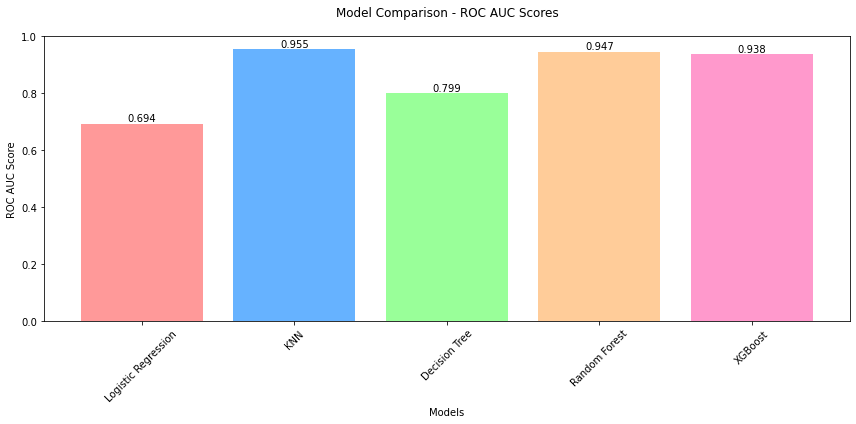

In [45]:
#Model Comparison
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
scores = [log_reg_score, knn_score, dt_score, rf_score, xgb_score]

# Create comparison plot
plt.figure(figsize=(12, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
bars = plt.bar(models, scores, color=colors)
plt.title('Model Comparison - ROC AUC Scores', pad=20)
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
